## GED conflict data clean up

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#import the ingester extension functions
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

Clearing Secondary Cache...


In [3]:
# Show a list of available transforms
!viewser transforms list


  > Transforms
  ---------------------------------------------------------
  | name           | path                               |
  |:---------------|:-----------------------------------|
  | rename         | any/util.rename                    |
  | ln             | any/ops.ln                         |
  | gte            | any/bool.gte                       |
  | lte            | any/bool.lte                       |
  | in_range       | any/bool.in_range                  |
  | delta          | any/temporal.delta                 |
  | tlag           | any/temporal.tlag                  |
  | tlead          | any/temporal.tlead                 |
  | moving_average | any/temporal.moving_average        |
  | moving_sum     | any/temporal.moving_sum            |
  | cweq           | any/temporal.cweq                  |
  | time_since     | any/temporal.time_since            |
  | decay          | any/temporal.decay                 |
  | onset_possible | any/temporal.onset_possible      

In [4]:
!viewser tables show ged2_cm    


  > Ged2_cm
  -------------------------------------------------------
  | name                    | path                    |
  |:------------------------|:------------------------|
  | country_month_id        | country_month_id        |
  | ged_sb_best_sum_nokgi   | ged_sb_best_sum_nokgi   |
  | ged_ns_best_sum_nokgi   | ged_ns_best_sum_nokgi   |
  | ged_os_best_sum_nokgi   | ged_os_best_sum_nokgi   |
  | ged_sb_best_count_nokgi | ged_sb_best_count_nokgi |
  | ged_ns_best_count_nokgi | ged_ns_best_count_nokgi |
  | ged_os_best_count_nokgi | ged_os_best_count_nokgi |
  | ged_sb_high_sum_nokgi   | ged_sb_high_sum_nokgi   |
  | ged_ns_high_sum_nokgi   | ged_ns_high_sum_nokgi   |
  | ged_os_high_sum_nokgi   | ged_os_high_sum_nokgi   |
  | ged_sb_high_count_nokgi | ged_sb_high_count_nokgi |
  | ged_ns_high_count_nokgi | ged_ns_high_count_nokgi |
  | ged_os_high_count_nokgi | ged_os_high_count_nokgi |
  | test                    | test                    |
  
  ----------------------------

In [5]:
#get the ged with countrylags to indicate conflict in neighbouring countries
data_conflict = (Queryset("ged2_cm", "country_month")
                 .with_column(Column("ged_best_sb", from_table="ged2_cm", from_column="ged_sb_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0))
                 .with_column(Column("ged_best_ns", from_table="ged2_cm", from_column="ged_ns_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0))
                 .with_column(Column("ged_best_os", from_table="ged2_cm", from_column="ged_os_best_count_nokgi")
                 .transform.spatial.countrylag(1,1,0,0)))


data_conflict = data_conflict.publish().fetch()

data_conflict

 .    

ged_best_sb  ged_best_ns  ged_best_os
month_id country_id                                       
1        1                   NaN          NaN          NaN
         2                   NaN          NaN          NaN
         3                   0.0          0.0          0.0
         4                   NaN          NaN          NaN
         5                   0.0          0.0          0.0
...                          ...          ...          ...
852      242                 0.0          0.0          0.0
         243                 0.0          0.0          0.0
         244                 0.0          0.0          0.0
         245                 0.0          0.0          0.0
         246                 0.0          0.0          0.0

[158230 rows x 3 columns]

In [6]:
#check for the distribution of 0 and 1
data_conflict.describe()

,ged_best_sb,ged_best_ns,ged_best_os
count,132662.000000,132662.000000,132662.000000
mean,8.833208,1.434985,1.883983
std,61.924916,11.656813,9.481348
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2017.000000,414.000000,1107.000000


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


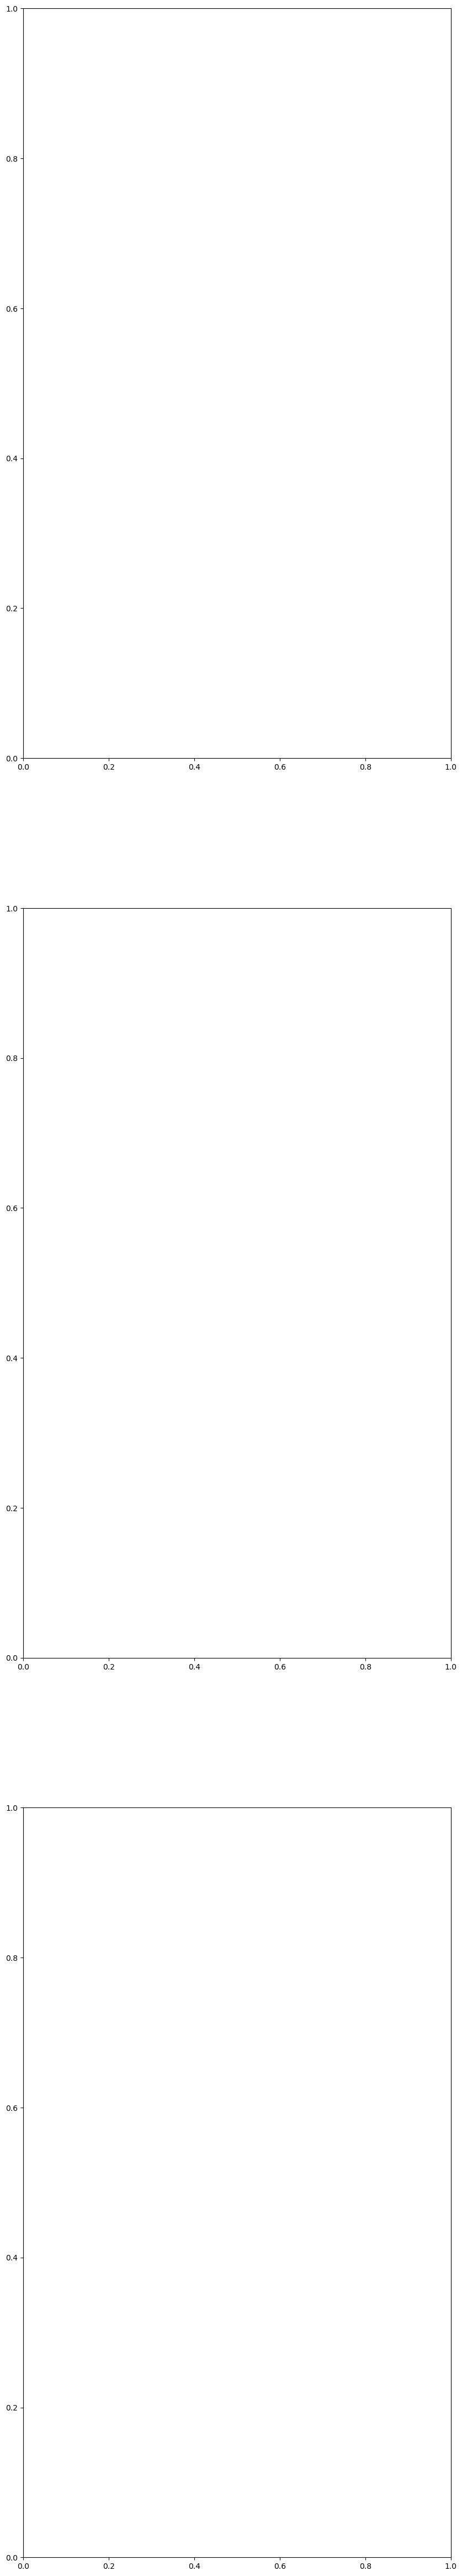

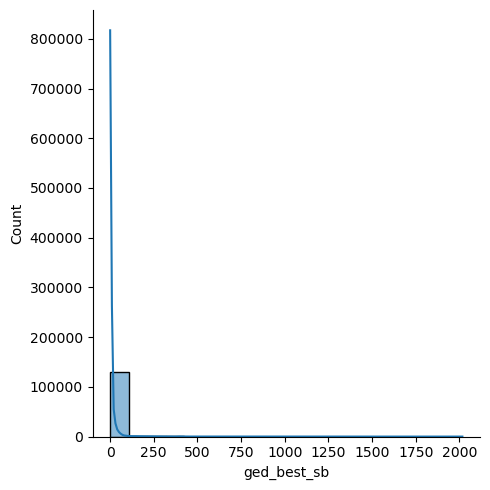

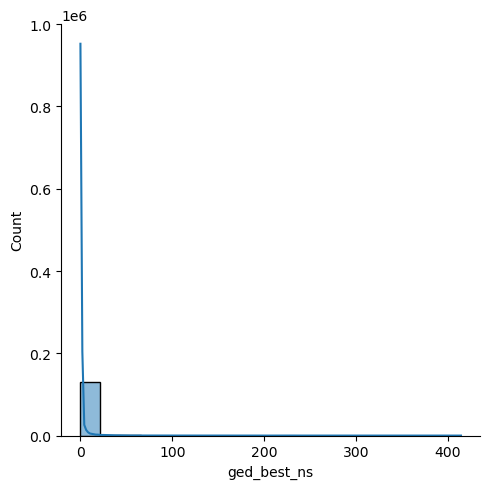

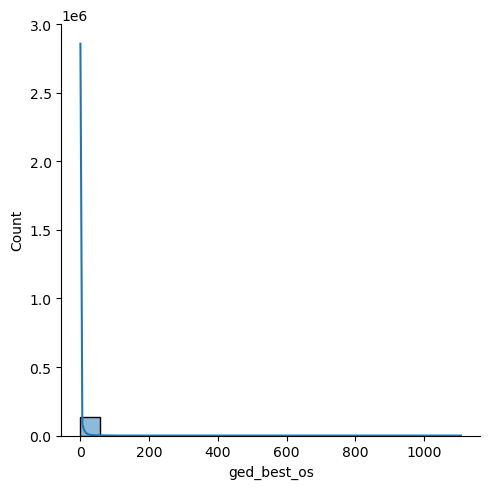

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure, axes = plt.subplots(3,1,figsize=(10,60))
sns.displot(data_conflict['ged_best_sb'],kde=True,ax=axes[0])
sns.displot(data_conflict['ged_best_ns'],kde=True,ax=axes[1])
sns.displot(data_conflict['ged_best_os'],kde=True,ax=axes[2])

In [8]:
#rename
data_conflict = data_conflict.rename(columns={'ged_best_sb':'best_sb_neighbor','ged_best_ns':'best_ns_neighbor','ged_best_os':'best_os_neighbor'})

In [9]:
#safe the data
data_conflict.to_csv('data_neighbor_conflict.csv')

## CUT HERE FOR MANUAL IMPORT

In [10]:
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'private/thesis/')

'/Users/NatStrom'

In [11]:
data = pd.read_csv('GEDEvent_v22_1.csv')

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2339/2663555733.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GEDEvent_v22_1.csv')


In [12]:
df = data.copy()

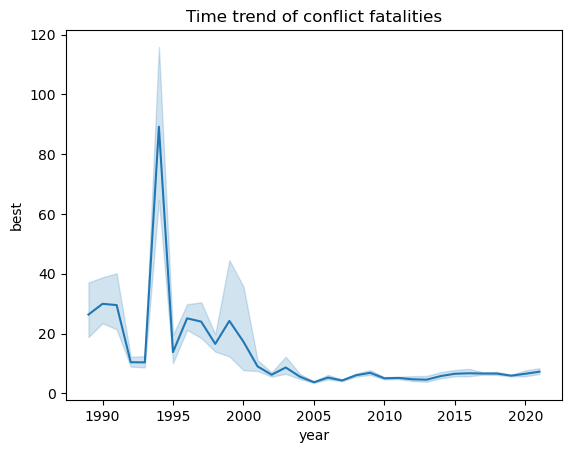

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='year',y='best',data=df)
plt.title('Time trend of conflict fatalities')
plt.savefig('best_nolog.png')


In [14]:
print(df.dtypes)
print(df.columns)
print(df.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(df['country_id'].drop_duplicates()))
list_year=list(list(df['year'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(df['country_id'].isnull().values.any())

id                     int64
relid                 object
year                   int64
active_year            int64
code_status           object
type_of_violence       int64
conflict_dset_id       int64
conflict_new_id        int64
conflict_name         object
dyad_dset_id           int64
dyad_new_id            int64
dyad_name             object
side_a_dset_id         int64
side_a_new_id          int64
side_a                object
side_b_dset_id         int64
side_b_new_id          int64
side_b                object
number_of_sources      int64
source_article        object
source_office         object
source_date           object
source_headline       object
source_original       object
where_prec             int64
where_coordinates     object
where_description     object
adm_1                 object
adm_2                 object
latitude             float64
longitude            float64
geom_wkt              object
priogrid_gid           int64
country               object
country_id    

In [15]:
#filter only the wanted columns
df_filtered = df.filter(['id', 'relid', 'year', 'type_of_violence','conflict_new_id','country_id','best', 'high', 'low'])

In [16]:
display(df_filtered)

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low
0,244657,IRQ-2017-1-524-322,2017,1,259,700,6,6,6
1,412700,IRQ-2021-1-524-145,2021,1,259,700,183,184,171
2,413023,IRQ-2021-1-524-143,2021,1,259,700,2,3,0
3,412909,IRQ-2021-1-524-144,2021,1,259,700,10,10,9
4,132140,AFG-1989-1-411-2,1989,1,333,700,6,6,6
...,...,...,...,...,...,...,...,...,...
293629,15525,MZM-1989-3-1347-4,1989,3,562,552,9,9,9
293630,15524,MZM-1989-3-1347-16,1989,3,562,552,9,9,9
293631,15245,MZM-1990-3-1347-18,1990,3,562,552,7,7,7
293632,15516,MZM-1990-3-1347-28,1990,3,562,552,1,1,1


In [17]:
from ingester3.scratch import cache_manager

cache_manager()

# This will import the Pandas extensions as well as bootstrap the object layer
from ingester3.extensions import *

Clearing Secondary Cache...


In [18]:
#create the c_id from the gw codes
#create c_ids
df_filtered = pd.DataFrame.cy.soft_validate_gwcode_year(df_filtered, gw_col='country_id', year_col = 'year', at_month = 12)
inspect=df_filtered.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

df_filtered = pd.DataFrame.c.from_gwcode(df_filtered, gw_col='country_id', month_col=None)

countries with invalid id below


,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id
138842,16107,SAF-1989-3-560-14,1989,3,477,565,0,300,0,False
138843,17748,SAF-1989-3-560-12,1989,3,477,565,0,27,0,False


In [19]:
#import the neighbor data
#transform month ids into year
data_conflict = data_conflict.reset_index()
data_conflict = data_conflict.rename(columns={'country_id':'c_id'})
data_conflict['year'] = data_conflict.cm.year
data_conflict

Clearing Secondary Cache...


,month_id,c_id,best_sb_neighbor,best_ns_neighbor,best_os_neighbor,year
0,1,1,NaN,NaN,NaN,1980
1,1,2,NaN,NaN,NaN,1980
2,1,3,0.0,0.0,0.0,1980
3,1,4,NaN,NaN,NaN,1980
4,1,5,0.0,0.0,0.0,1980
...,...,...,...,...,...,...
158225,852,242,0.0,0.0,0.0,2050
158226,852,243,0.0,0.0,0.0,2050
158227,852,244,0.0,0.0,0.0,2050
158228,852,245,0.0,0.0,0.0,2050


In [20]:
data_conflict = data_conflict.groupby(['year','c_id']).sum()
data_conflict['best_neighbor']=data_conflict['best_sb_neighbor'] + data_conflict['best_os_neighbor'] + data_conflict['best_ns_neighbor']

In [21]:
#sum up to create a dummy for neighboring country in conflict or not
def categorize(column):  
    if column['best_neighbor'] >= 25:
        return 1
    return 0

data_conflict['dummy_neighbor'] = data_conflict.apply(lambda row: categorize(row), axis=1)
data_conflict

month_id  best_sb_neighbor  best_ns_neighbor  best_os_neighbor  \
year c_id                                                                   
1980 1           78               0.0               0.0               0.0   
     2           78               0.0               0.0               0.0   
     3           78               0.0               0.0               0.0   
     4           78               0.0               0.0               0.0   
     5           78               0.0               0.0               0.0   
...             ...               ...               ...               ...   
2050 242      10158               0.0               0.0               0.0   
     243      10158               0.0               0.0               0.0   
     244      10158               0.0               0.0               0.0   
     245      10158               0.0               0.0               0.0   
     246      10158               0.0               0.0               0.0   

           best_neighbor  dummy_neighbor  
year c_id                                 
1980 1               0.0               0  
     2               0.0               0  
     3               0.0               0  
     4               0.0               0  
     5               0.0               0  
...                  ...             ...  
2050 242             0.0               0  
     243             0.0               0  
     244             0.0               0  
     245             0.0               0  
     246             0.0               0  

[13223 rows x 6 columns]

In [22]:
data_conflict = data_conflict.reset_index()
data_conflict = data_conflict.drop(columns=['month_id','best_sb_neighbor','best_ns_neighbor','best_os_neighbor','best_neighbor'])

In [23]:
#join with the nbeighbouring conflict country data
display(data_conflict)
df_filtered = pd.merge(df_filtered,data_conflict,how='outer',on=('c_id','year'))

,year,c_id,dummy_neighbor
0,1980,1,0
1,1980,2,0
2,1980,3,0
3,1980,4,0
4,1980,5,0
...,...,...,...
13218,2050,242,0
13219,2050,243,0
13220,2050,244,0
13221,2050,245,0


In [24]:
df_filtered['Africa'] = df_filtered.c.in_africa

Clearing Secondary Cache...


In [25]:
df_filtered = df_filtered.query('Africa == True')

In [26]:
#get the iso numbers
df_filtered['iso'] = df_filtered.c.isoab

Clearing Secondary Cache...


In [27]:
inspect = df_filtered.loc[df_filtered.iso.isna()]
display(inspect)

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id,c_id,dummy_neighbor,Africa,iso


In [28]:
df_conflict = df_filtered.copy()

In [29]:
df_conflict

,id,relid,year,type_of_violence,conflict_new_id,country_id,best,high,low,valid_id,c_id,dummy_neighbor,Africa,iso
41447,2629.0,ALG-1990-1-2-1,1990,1.0,386.0,615.0,1.0,1.0,1.0,True,67,0.0,True,DZA
41448,5751.0,ALG-1991-1-2-4,1991,1.0,386.0,615.0,3.0,3.0,3.0,True,67,0.0,True,DZA
41449,2587.0,ALG-1991-1-2-1,1991,1.0,386.0,615.0,4.0,4.0,4.0,True,67,0.0,True,DZA
41450,4216.0,ALG-1991-1-2-2,1991,1.0,386.0,615.0,10.0,10.0,10.0,True,67,0.0,True,DZA
41451,3160.0,ALG-1991-1-2-3,1991,1.0,386.0,615.0,17.0,17.0,17.0,True,67,0.0,True,DZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305072,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242,0.0,True,TZA
305073,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243,0.0,True,MAR
305074,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244,0.0,True,MRT
305075,NaN,NaN,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,0.0,True,SDN


In [30]:
df_conflict = df_conflict.drop(columns=['valid_id','Africa','c_id','relid','conflict_new_id','country_id','id'])
df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso
41447,1990,1.0,1.0,1.0,1.0,0.0,DZA
41448,1991,1.0,3.0,3.0,3.0,0.0,DZA
41449,1991,1.0,4.0,4.0,4.0,0.0,DZA
41450,1991,1.0,10.0,10.0,10.0,0.0,DZA
41451,1991,1.0,17.0,17.0,17.0,0.0,DZA
...,...,...,...,...,...,...,...
305072,2050,NaN,NaN,NaN,NaN,0.0,TZA
305073,2050,NaN,NaN,NaN,NaN,0.0,MAR
305074,2050,NaN,NaN,NaN,NaN,0.0,MRT
305075,2050,NaN,NaN,NaN,NaN,0.0,SDN


In [31]:
#make a binary predictor of it --> conflict or not and then also high conflict or not, low conflict or not etc
#create dummies
def categorize(row):  
    if row['best'] >= 25 :
        return 1
    return 0

df_conflict['dummy_conflict'] = df_conflict.apply(lambda row: categorize(row), axis=1)
df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso,dummy_conflict
41447,1990,1.0,1.0,1.0,1.0,0.0,DZA,0
41448,1991,1.0,3.0,3.0,3.0,0.0,DZA,0
41449,1991,1.0,4.0,4.0,4.0,0.0,DZA,0
41450,1991,1.0,10.0,10.0,10.0,0.0,DZA,0
41451,1991,1.0,17.0,17.0,17.0,0.0,DZA,0
...,...,...,...,...,...,...,...,...
305072,2050,NaN,NaN,NaN,NaN,0.0,TZA,0
305073,2050,NaN,NaN,NaN,NaN,0.0,MAR,0
305074,2050,NaN,NaN,NaN,NaN,0.0,MRT,0
305075,2050,NaN,NaN,NaN,NaN,0.0,SDN,0


In [32]:
#replace row values
df_conflict['type_of_violence'] = df_conflict['type_of_violence'].map({1:'sb',
                                            2:'ns',
                                            3:'os'})

In [33]:
#create dummies
def categorize(row):  
    if row['type_of_violence'] == 'sb':
        return 1
    return 0

df_conflict['dummy_sb'] = df_conflict.apply(lambda row: categorize(row), axis=1)

# repeat for non-state violence
def categorize(row):  
    if row['type_of_violence'] == 'ns':
        return 1
    return 0

df_conflict['dummy_ns'] = df_conflict.apply(lambda row: categorize(row), axis=1)

#repeat dummy creation for one-sided violence
def categorize(row):  
    if row['type_of_violence'] == 'os':
        return 1
    return 0

df_conflict['dummy_os'] = df_conflict.apply(lambda row: categorize(row), axis=1)



In [34]:
df_conflict.best.describe()

count    53989.000000
mean        25.644391
std        466.595365
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max      48183.000000
Name: best, dtype: float64

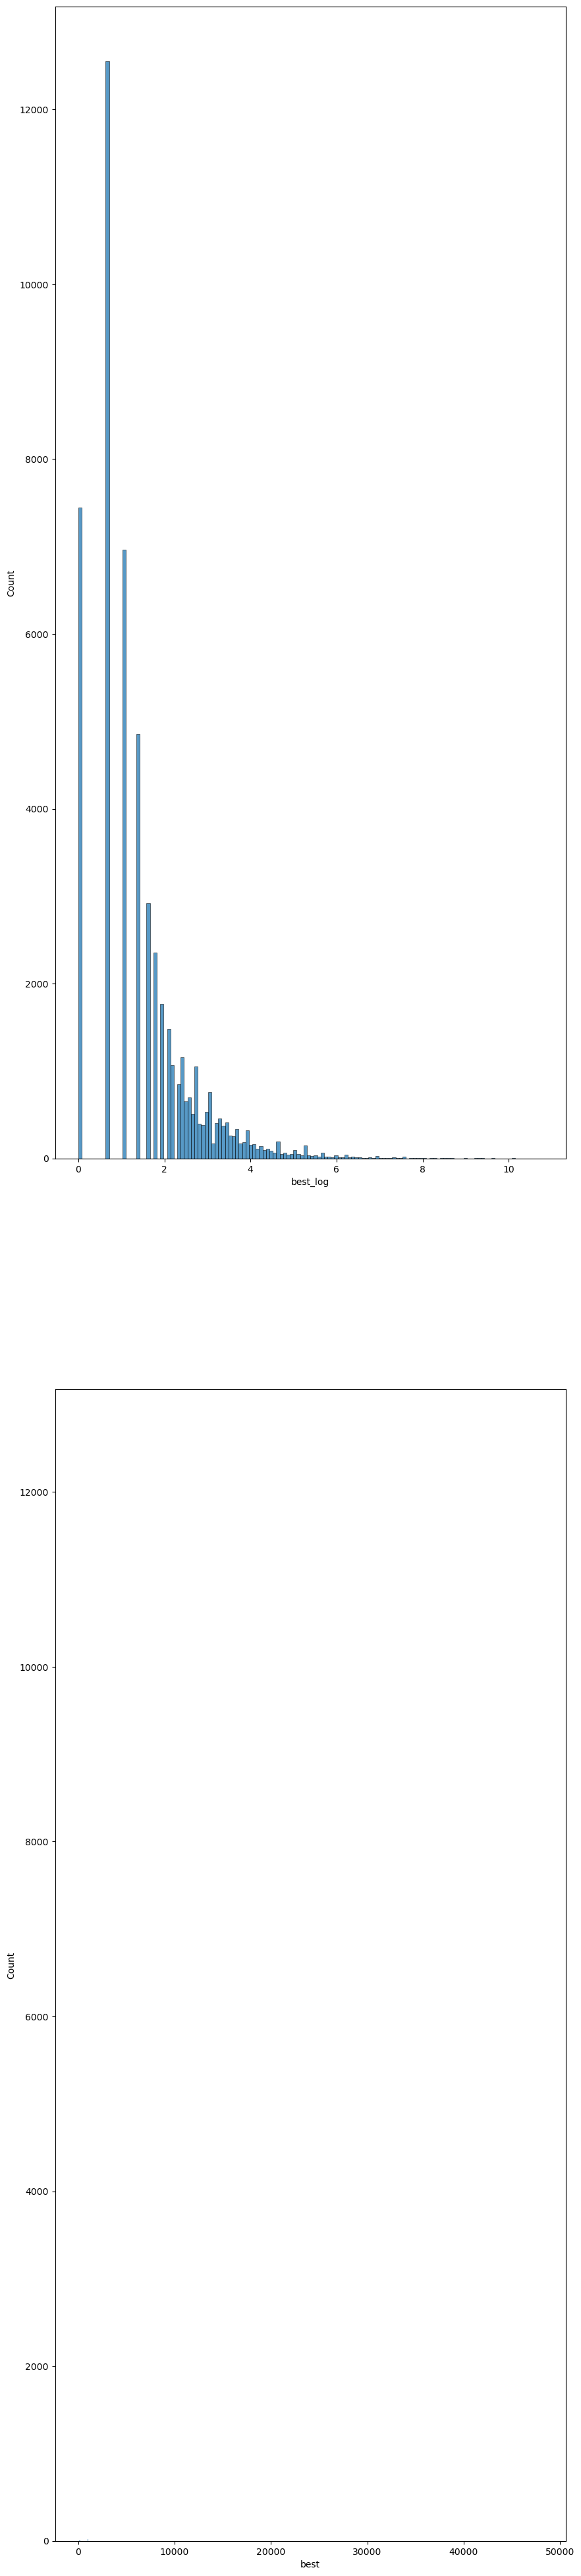

In [35]:
#log transfrom the best fatalities estimates
df_conflict['best_log'] = np.log1p(df_conflict['best'])
#compare skewed and logtransformed best
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure, axes = plt.subplots(2,1,figsize=(10,50))
sns.histplot(df_conflict['best_log'],ax=axes[0])
sns.histplot(df_conflict['best'],ax=axes[1])

plt.savefig('conflict_log.png')

Now import the other dataset to get estimates elading back to 1970 for the lags

In [36]:
#now produce the lags and filter out the unwanted years
#now I need to loop the lagging function, creating a new column and appending them all together to then have a dataframe i can concanate
df_conflict = df_conflict.loc[df_conflict['year'] <= 2019]
df_conflict['lag_best_1'] = df_conflict.groupby('iso')['best_log'].shift(1)
df_conflict['lag_best_2'] = df_conflict.groupby('iso')['best_log'].shift(2)
df_conflict['lag_best_3'] = df_conflict.groupby('iso')['best_log'].shift(3)
df_conflict['lag_best_4'] = df_conflict.groupby('iso')['best_log'].shift(4)
df_conflict['lag_best_5'] = df_conflict.groupby('iso')['best_log'].shift(5)
df_conflict['lag_best_6'] = df_conflict.groupby('iso')['best_log'].shift(6)
df_conflict['lag_best_7'] = df_conflict.groupby('iso')['best_log'].shift(7)
df_conflict['lag_best_8'] = df_conflict.groupby('iso')['best_log'].shift(8)
df_conflict['lag_best_9'] = df_conflict.groupby('iso')['best_log'].shift(9)
df_conflict['lag_best_10'] = df_conflict.groupby('iso')['best_log'].shift(10)
#df_conflict = df_conflict.loc[df_conflict['year'] >= 1990]

df_conflict

,year,type_of_violence,best,high,low,dummy_neighbor,iso,dummy_conflict,dummy_sb,dummy_ns,...,lag_best_1,lag_best_2,lag_best_3,lag_best_4,lag_best_5,lag_best_6,lag_best_7,lag_best_8,lag_best_9,lag_best_10
41447,1990,sb,1.0,1.0,1.0,0.0,DZA,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41448,1991,sb,3.0,3.0,3.0,0.0,DZA,0,1,0,...,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41449,1991,sb,4.0,4.0,4.0,0.0,DZA,0,1,0,...,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41450,1991,sb,10.0,10.0,10.0,0.0,DZA,0,1,0,...,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41451,1991,sb,17.0,17.0,17.0,0.0,DZA,0,1,0,...,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,2019,NaN,NaN,NaN,NaN,0.0,NAM,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299256,2019,NaN,NaN,NaN,NaN,0.0,MUS,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299257,2019,NaN,NaN,NaN,NaN,0.0,SYC,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299274,2019,NaN,NaN,NaN,NaN,0.0,MAR,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_conflict.columns

Index(['year', 'type_of_violence', 'best', 'high', 'low', 'dummy_neighbor',
       'iso', 'dummy_conflict', 'dummy_sb', 'dummy_ns', 'dummy_os', 'best_log',
       'lag_best_1', 'lag_best_2', 'lag_best_3', 'lag_best_4', 'lag_best_5',
       'lag_best_6', 'lag_best_7', 'lag_best_8', 'lag_best_9', 'lag_best_10'],
      dtype='object')

In [38]:
df_conflict = df_conflict.drop(columns=['best', 'high', 'low'])
df_conflict

,year,type_of_violence,dummy_neighbor,iso,dummy_conflict,dummy_sb,dummy_ns,dummy_os,best_log,lag_best_1,lag_best_2,lag_best_3,lag_best_4,lag_best_5,lag_best_6,lag_best_7,lag_best_8,lag_best_9,lag_best_10
41447,1990,sb,0.0,DZA,0,1,0,0,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41448,1991,sb,0.0,DZA,0,1,0,0,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41449,1991,sb,0.0,DZA,0,1,0,0,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41450,1991,sb,0.0,DZA,0,1,0,0,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41451,1991,sb,0.0,DZA,0,1,0,0,2.890372,2.397895,1.609438,1.386294,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299254,2019,NaN,0.0,NAM,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299256,2019,NaN,0.0,MUS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299257,2019,NaN,0.0,SYC,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299274,2019,NaN,0.0,MAR,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_conflict.to_csv('df_conflict.csv')